In [1]:
print('[Info]: Importing Libraries...')

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from datetime import datetime
import xgboost
from sklearn.metrics import accuracy_score, auc, roc_auc_score


In [2]:
X = pd.read_csv('train_modified.csv')
test_data = pd.read_csv('test_modified.csv')

In [3]:
y = X.loan_status.copy()
X = X.drop(columns = "loan_status", axis=1)

### There are a few NaN values, we will get rid of those by imputing

In [4]:
features_to_imput_with_median = ['emp_length']

In [5]:
features_to_imput_with_zero = ['annual_inc','delinq_2yrs','inq_last_6mths', 'open_acc',
                              'pub_rec', 'revol_util', 'total_acc',
                              'collections_12_mths_ex_med', 'acc_now_delinq',
                              'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']


In [6]:
for features in features_to_imput_with_median:
    print('Imputation with Median: %s' % (features))
    X[features].fillna(X[features].median(), inplace=True)
    test_data[features].fillna(test_data[features].median(), inplace=True)

Imputation with Median: emp_length


In [7]:
for features in features_to_imput_with_zero:
    print('Imputation with Zero: %s' % (features))
    X[features].fillna(0, inplace=True)
    test_data[features].fillna(0, inplace=True)

Imputation with Zero: annual_inc
Imputation with Zero: delinq_2yrs
Imputation with Zero: inq_last_6mths
Imputation with Zero: open_acc
Imputation with Zero: pub_rec
Imputation with Zero: revol_util
Imputation with Zero: total_acc
Imputation with Zero: collections_12_mths_ex_med
Imputation with Zero: acc_now_delinq
Imputation with Zero: tot_coll_amt
Imputation with Zero: tot_cur_bal
Imputation with Zero: total_rev_hi_lim


In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [9]:


eval_set = [(X_test, y_test)]

st = datetime.now()

print('[Info]: Training Started at {}\n'.format(st))


clf = xgboost.sklearn.XGBClassifier(
    objective = "binary:logistic", 
    learning_rate = 0.05,
    seed = 8888,
    max_depth = 20, 
    gamma = 10, 
    n_estimators = 500, 
    use_label_encoder = False)

clf.fit(X_train, y_train, early_stopping_rounds = 20,
        eval_metric="auc", eval_set = eval_set, verbose = True)

print('\nTime Requird to Complete the Training : {}'.format(
    datetime.now()-st))

[Info]: Training Started at 2021-05-28 20:26:03.307890

[0]	validation_0-auc:0.92928
[1]	validation_0-auc:0.93422
[2]	validation_0-auc:0.93689
[3]	validation_0-auc:0.93804
[4]	validation_0-auc:0.93909
[5]	validation_0-auc:0.93958
[6]	validation_0-auc:0.94056
[7]	validation_0-auc:0.94088
[8]	validation_0-auc:0.94139
[9]	validation_0-auc:0.94183
[10]	validation_0-auc:0.94217
[11]	validation_0-auc:0.94248
[12]	validation_0-auc:0.94274
[13]	validation_0-auc:0.94300
[14]	validation_0-auc:0.94315
[15]	validation_0-auc:0.94347
[16]	validation_0-auc:0.94370
[17]	validation_0-auc:0.94390
[18]	validation_0-auc:0.94410
[19]	validation_0-auc:0.94439
[20]	validation_0-auc:0.94456
[21]	validation_0-auc:0.94461
[22]	validation_0-auc:0.94486
[23]	validation_0-auc:0.94512
[24]	validation_0-auc:0.94529
[25]	validation_0-auc:0.94540
[26]	validation_0-auc:0.94546
[27]	validation_0-auc:0.94550
[28]	validation_0-auc:0.94562
[29]	validation_0-auc:0.94569
[30]	validation_0-auc:0.94576
[31]	validation_0-auc:0.

[267]	validation_0-auc:0.95025
[268]	validation_0-auc:0.95027
[269]	validation_0-auc:0.95025
[270]	validation_0-auc:0.95026
[271]	validation_0-auc:0.95027
[272]	validation_0-auc:0.95026
[273]	validation_0-auc:0.95026
[274]	validation_0-auc:0.95025
[275]	validation_0-auc:0.95025
[276]	validation_0-auc:0.95027
[277]	validation_0-auc:0.95027
[278]	validation_0-auc:0.95027
[279]	validation_0-auc:0.95027
[280]	validation_0-auc:0.95027
[281]	validation_0-auc:0.95027
[282]	validation_0-auc:0.95027
[283]	validation_0-auc:0.95027
[284]	validation_0-auc:0.95027
[285]	validation_0-auc:0.95027
[286]	validation_0-auc:0.95027
[287]	validation_0-auc:0.95027
[288]	validation_0-auc:0.95027
[289]	validation_0-auc:0.95027
[290]	validation_0-auc:0.95027
[291]	validation_0-auc:0.95027
[292]	validation_0-auc:0.95027
[293]	validation_0-auc:0.95027
[294]	validation_0-auc:0.95027
[295]	validation_0-auc:0.95027
[296]	validation_0-auc:0.95027

Time Requird to Complete the Training : 0:05:18.842684


In [10]:
y_pred = clf.predict(X_test)

accuracy = accuracy_score(np.array(y_test).flatten(), y_pred)

print("Accuracy: %.6f" % (accuracy))

accuracy_per_roc_auc = roc_auc_score(np.array(y_test).flatten(), y_pred)
print("ROC-AUC: %.6f" % (accuracy_per_roc_auc))


Accuracy: 0.913341
ROC-AUC: 0.858539


In [12]:
final_pred = pd.DataFrame(clf.predict_proba(np.array(test_data)))

test_member_id = pd.DataFrame(test_data['member_id'])

submit = pd.concat([test_member_id, final_pred.iloc[:, 1:2]], axis=1)

submit.rename(columns={1:'loan_status'}, inplace=True)
submit.to_csv('final_submission.csv', index=False)


[0.14576998 0.02470496 0.01552927 0.02314113 0.00889914 0.01026414
 0.00877854 0.007289   0.0092259  0.00771673 0.0090133  0.00844549
 0.00840724 0.00843016 0.02826023 0.01381996 0.3193449  0.00724806
 0.00461159 0.0067345  0.01024116 0.00846457 0.03841199 0.01591196
 0.02562965 0.02826063 0.02123989 0.02024624 0.01348124 0.01041532
 0.01062789 0.00858955 0.00929486 0.00811824 0.00922158 0.00588748
 0.0107667  0.01061635 0.00515438 0.00667619 0.00454037 0.00594549
 0.00606821 0.00542277 0.00786674 0.         0.00765783 0.00511677
 0.00449165]

0 member_id
1 loan_amnt
2 funded_amnt
3 funded_amnt_inv
4 emp_length
5 annual_inc
6 dti
7 delinq_2yrs
8 inq_last_6mths
9 open_acc
10 pub_rec
11 revol_bal
12 revol_util
13 total_acc
14 total_rec_int
15 total_rec_late_fee
16 recoveries
17 collections_12_mths_ex_med
18 acc_now_delinq
19 tot_coll_amt
20 tot_cur_bal
21 total_rev_hi_lim
22 int_rate_bins_low
23 int_rate_bins_mid
24 int_rate_bins_high
25 grade_A
26 grade_B
27 grade_C
28 grade_D
29 grade_

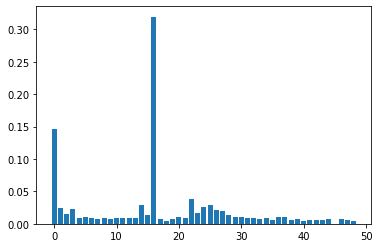

In [13]:

print(clf.feature_importances_)
print()
idx = 0

for x in list(test_data):
    print('%d %s' % (idx, x))
    idx += 1
plt.bar(range(len(clf.feature_importances_)), clf.feature_importances_)
plt.show()